In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure',figsize=(15,8))

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Cloud Warehouse Compersion Chart.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/May-2022.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/P  L March 2021.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Expense IIGF.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Sale Report.csv


In [2]:
df = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv')

# 1. Data Processiong

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      37432 non-null  int64 
 1   DATE       37431 non-null  object
 2   Months     37407 non-null  object
 3   CUSTOMER   36392 non-null  object
 4   Style      36392 non-null  object
 5   SKU        34958 non-null  object
 6   Size       36392 non-null  object
 7   PCS        36392 non-null  object
 8   RATE       36392 non-null  object
 9   GROSS AMT  36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [4]:
df.head()

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

index           0
DATE            1
Months         25
CUSTOMER     1040
Style        1040
SKU          2474
Size         1040
PCS          1040
RATE         1040
GROSS AMT    1040
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

index        0
DATE         0
Months       0
CUSTOMER     0
Style        0
SKU          0
Size         0
PCS          0
RATE         0
GROSS AMT    0
dtype: int64

In [8]:
date_format = '%Y-%m-%d'

# Convert the 'DATE' column to datetime with the specified format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

df['GROSS AMT'] = pd.to_numeric(df['GROSS AMT'], errors='coerce')
df['PCS'] = pd.to_numeric(df['PCS'], errors='coerce')


/tmp/ipykernel_20/1027962235.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


In [9]:
df['Months'] = df.DATE.values.astype('datetime64[M]')  
df['Day'] = df.DATE.values.astype('datetime64[D]')

In [10]:
df.head()

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT,Day
0,0,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0,2021-06-05
1,1,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0,2021-06-05
2,2,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0,2021-06-05
3,3,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0,2021-06-05
4,4,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0,2021-06-05


# 2. Overall Customer Consumption Analysis

In [11]:
df[['PCS','GROSS AMT']].describe()


,PCS,GROSS AMT
count,34957.000000,34957.000000
mean,418.440291,428.443717
std,972.254741,580.132649
min,1.000000,0.000000
25%,1.000000,10.000000
50%,305.560000,251.000000
75%,611.250000,650.000000
max,57400.000000,9735.000000


The average number of pieces sold is approximately 418.44. The standard deviation is high (972.25), indicating a significant variation in the number of pieces sold.
The average gross amount is approximately 428.44. The standard deviation is 580.13, indicating variability in the total amount of sales.

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.groupby('CUSTOMER')[['PCS','GROSS AMT']].sum().describe()


,PCS,GROSS AMT
count,136.000,136.000
mean,107554.539,110125.787
std,425256.887,187571.949
min,0.000,0.000
25%,39.750,25086.250
50%,75.000,50751.000
75%,314.000,121393.000
max,2651569.100,1713617.000


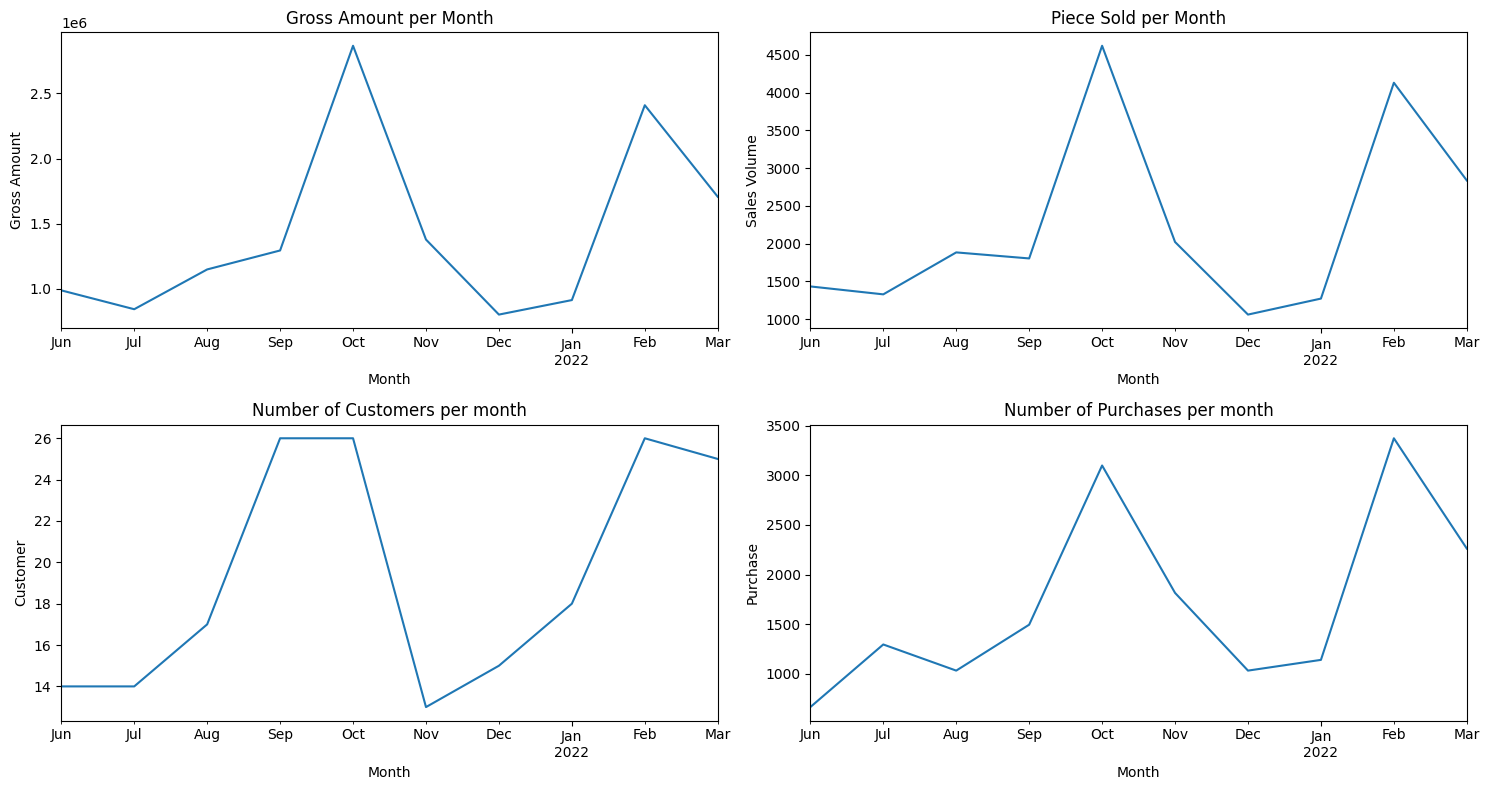

In [13]:
plt.subplot(221)
df.groupby('Months')['GROSS AMT'].sum().plot()
plt.xlabel('Month')
plt.ylabel('Gross Amount')
plt.title('Gross Amount per Month')

 
plt.subplot(222)
df.groupby('Months').PCS.sum().plot()
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.title('Piece Sold per Month')

 
plt.subplot(223)
df.groupby('Months').CUSTOMER.nunique().plot()
plt.xlabel('Month')
plt.ylabel('Customer')
plt.title('Number of Customers per month')

 
plt.subplot(224)
df.groupby('Months').CUSTOMER.count().plot()
plt.xlabel('Month')
plt.ylabel('Purchase')
plt.title('Number of Purchases per month')
plt.tight_layout()

Sales amount, piece sold, and number of purchases basically show the same trend. Sales volume increased rapidly in September 2011 and then declined rapidly after peaking (more than 4500) in October.

# 3. Customer Individual Consumption Analysis

In [14]:
df1 = df.groupby('CUSTOMER')[['PCS','GROSS AMT']].sum()
df1

,PCS,GROSS AMT
CUSTOMER,,
AANCHOL,18.000,11452.000
ABBI COLLECTION,70.000,37114.000
ABDUL RAHMAN(SINGAPORE),96.000,48106.000
ADDVEN SOLUTIONS PRIVATE LIMITED,46.000,32228.000
AKASH KAUSHAL,10.000,5580.000
...,...,...
VISHA DEVAN,474.000,321028.000
VISHAL DARSHAN BOUTIQUE,457.000,316277.000
YAMUNAH PUSPANATHAN,29.000,17899.000


In [15]:
customer_cumsum = df1.sort_values('GROSS AMT').apply(lambda x:x.cumsum() / x.sum())
customer_cumsum.index = range(1,len(customer_cumsum)+1)
customer_cumsum

,PCS,GROSS AMT
1,0.000,0.000
2,0.000,0.000
3,0.000,0.001
4,0.000,0.001
5,0.000,0.001
...,...,...
132,1.000,0.759
133,1.000,0.788
134,1.000,0.823
135,1.000,0.886


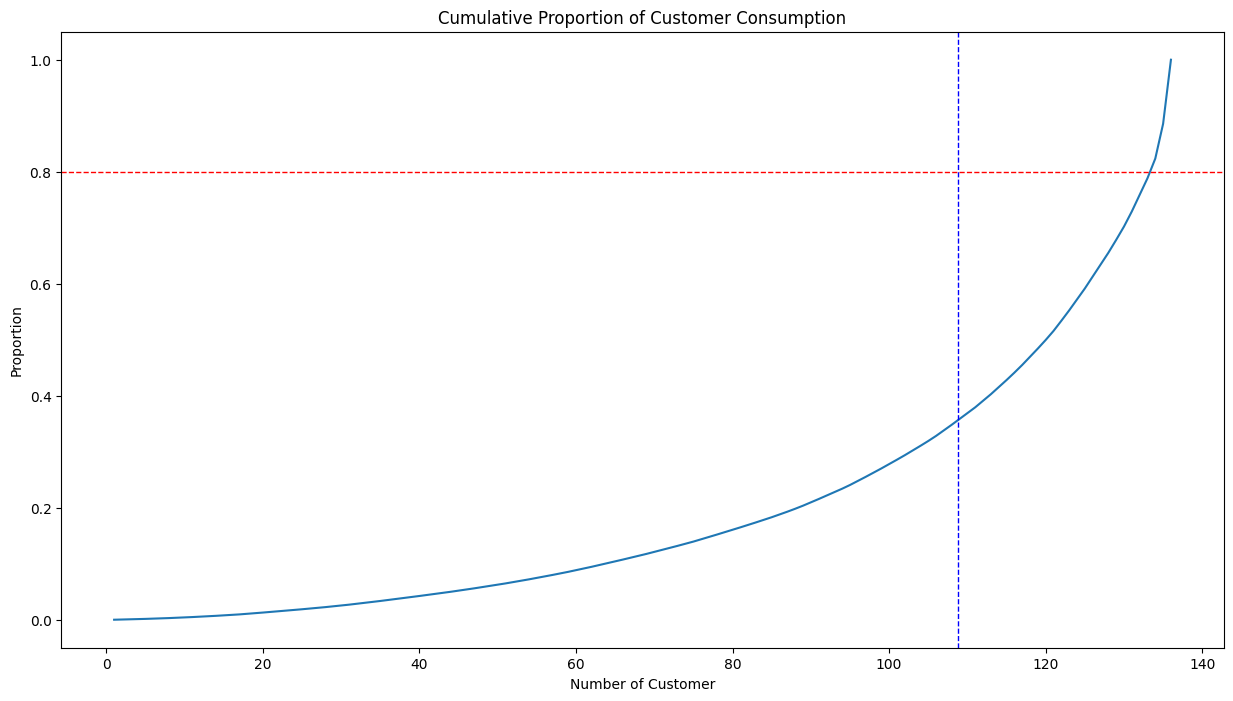

In [16]:
customer_cumsum['GROSS AMT'].plot()
plt.title('Cumulative Proportion of Customer Consumption')
plt.xlabel('Number of Customer')
plt.ylabel('Proportion')
plt.axhline(y = 0.8,ls = "--",c = "r",lw = 1) 
plt.axvline(x = (df.CUSTOMER.nunique())*0.8,ls = "--",c = "b",lw = 1) 
plt.show()


80% of customers contribute less than 40% of sales amount, which is in line with the 80/20 rule

# 4. Customer Value Analysis (RFM Model)

In [17]:
rfm = df.pivot_table(index='CUSTOMER',
                     values=['DATE','PCS','GROSS AMT'],
                     aggfunc = {'DATE':'max','PCS':'count','GROSS AMT':'sum'}                     
                    )
rfm.head()

,DATE,GROSS AMT,PCS
CUSTOMER,,,
AANCHOL,2021-07-16,11452.000,4
ABBI COLLECTION,2022-02-05,37114.000,70
ABDUL RAHMAN(SINGAPORE),2021-12-16,48106.000,96
ADDVEN SOLUTIONS PRIVATE LIMITED,2021-10-20,32228.000,46
AKASH KAUSHAL,2021-09-07,5580.000,10


In [18]:
rfm['Recency'] = (rfm.DATE.max()-rfm.DATE)/np.timedelta64(1,'D')
rfm.rename(columns={'GROSS AMT':'Monetary','PCS':'Frequency'},inplace =True)
del rfm['DATE']
rfm.head()

,Monetary,Frequency,Recency
CUSTOMER,,,
AANCHOL,11452.000,4,258.000
ABBI COLLECTION,37114.000,70,54.000
ABDUL RAHMAN(SINGAPORE),48106.000,96,105.000
ADDVEN SOLUTIONS PRIVATE LIMITED,32228.000,46,162.000
AKASH KAUSHAL,5580.000,10,205.000


In [19]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level.Recency + level.Frequency + level.Monetary
    dict = {
            '011':'A',
            '111':'B',
            '101':'C',
            '001':'D',
            '110':'E',
            '010':'F',
            '100':'G',
            '000':'H'
            }

    result = dict[label]
    return result

rfm['label'] =rfm[['Recency','Frequency','Monetary']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head()

,Monetary,Frequency,Recency,label
CUSTOMER,,,,
AANCHOL,11452.000,4,258.000,G
ABBI COLLECTION,37114.000,70,54.000,H
ABDUL RAHMAN(SINGAPORE),48106.000,96,105.000,H
ADDVEN SOLUTIONS PRIVATE LIMITED,32228.000,46,162.000,G
AKASH KAUSHAL,5580.000,10,205.000,G


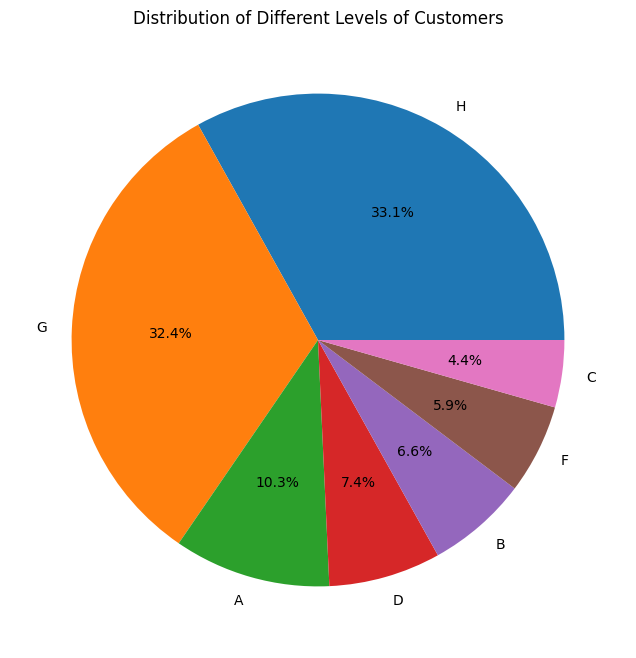

In [20]:
rfm.groupby('label').size().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Different Levels of Customers")
plt.show()

A refers to the most important value customers, accounting for only 10.3%

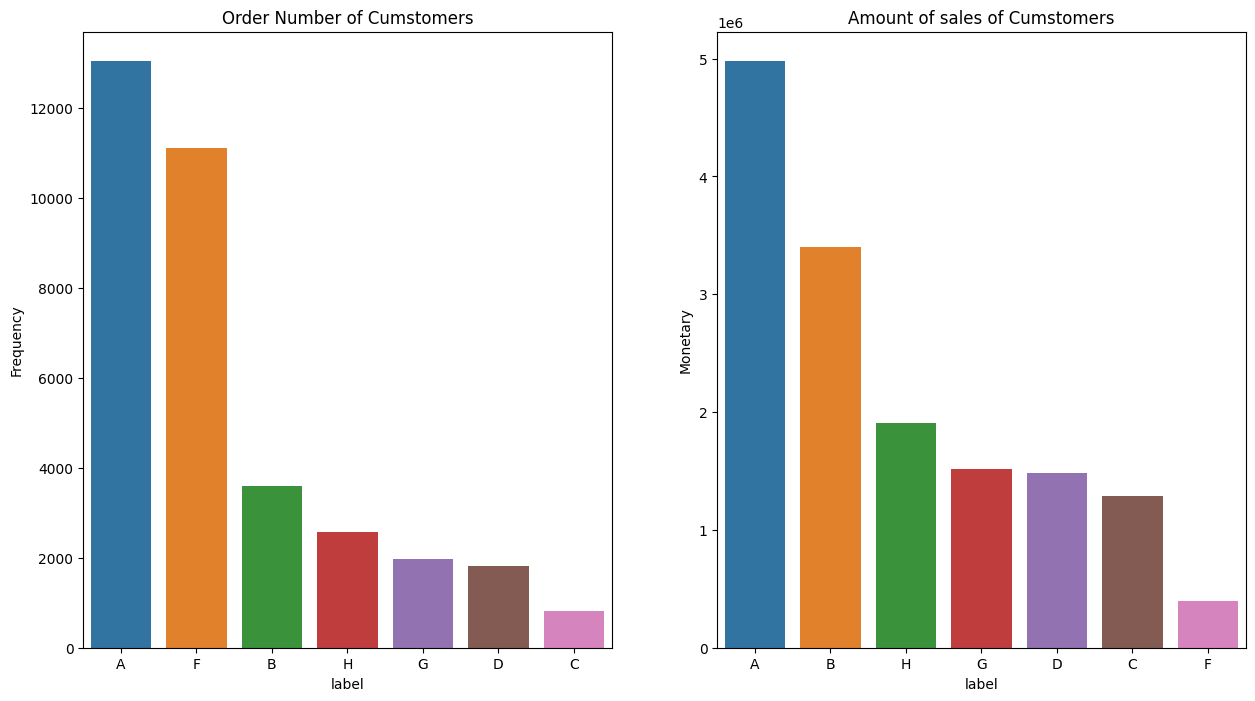

In [21]:
rfm_label =  rfm.groupby('label').sum().reset_index(drop=False)

plt.subplot(121)
plt.title('Order Number of Cumstomers')
sns.barplot(x='label',y='Frequency',data=rfm_label.sort_values(by='Frequency',ascending=False))

plt.subplot(122)
plt.title('Amount of sales of Cumstomers')
sns.barplot(x='label',y='Monetary',data=rfm_label.sort_values(by='Monetary',ascending=False))
plt.show()

# 5. Indices (Repurchase Rates and Retention Rates)

In [22]:
cumstomer = df.pivot_table(index = 'CUSTOMER',
                           columns = 'Months',
                           values ='DATE',
                           aggfunc ='count' ).fillna(0)

cumstomer.head()

Months,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01
CUSTOMER,,,,,,,,,,
AANCHOL,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ABBI COLLECTION,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,70.000,0.000
ABDUL RAHMAN(SINGAPORE),0.000,0.000,0.000,0.000,0.000,72.000,24.000,0.000,0.000,0.000
ADDVEN SOLUTIONS PRIVATE LIMITED,0.000,0.000,0.000,0.000,46.000,0.000,0.000,0.000,0.000,0.000
AKASH KAUSHAL,0.000,0.000,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000


In [23]:
repurchase =cumstomer.applymap(lambda x: 1 if x>1 else 0)
repurchase_rate = repurchase.apply(lambda x: x.sum()/x.count(),axis=0)
repurchase_rate.head()

Months
2021-06-01   0.112
2021-07-01   0.112
2021-08-01   0.136
2021-09-01   0.208
2021-10-01   0.208
dtype: float64

Text(0, 0.5, 'Rate')

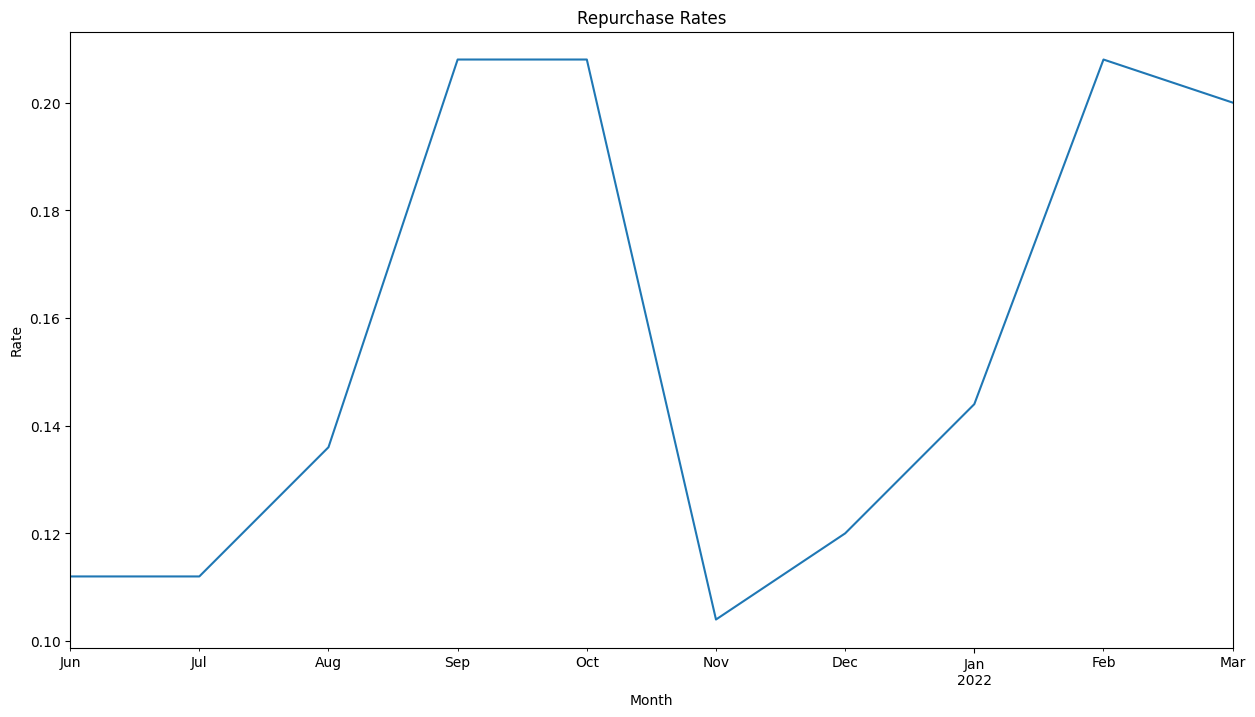

In [24]:
repurchase_rate.plot()
plt.title('Repurchase Rates')
plt.xlabel('Month')
plt.ylabel('Rate')

In [25]:
customer_life = df.groupby('CUSTOMER').DATE.agg(['min','max'])
df_copy = df.copy()
 
customer_retention = pd.merge(left=df_copy,
                          right = customer_life['min'].reset_index(),
                          how = 'inner',
                          on = 'CUSTOMER'
                         )
 
customer_retention['order_dt_diff'] = customer_retention['DATE']-customer_retention['min']
 
customer_retention['order_dt_diff'] = customer_retention.order_dt_diff.apply(lambda x:x/np.timedelta64(1,'D'))
customer_retention.head()

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT,Day,min,order_dt_diff
0,0,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.000,616.56,617.000,2021-06-05,2021-06-05,0.000
1,1,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.000,616.56,617.000,2021-06-05,2021-06-05,0.000
2,2,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.000,616.56,617.000,2021-06-05,2021-06-05,0.000
3,3,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.000,616.56,617.000,2021-06-05,2021-06-05,0.000
4,4,2021-06-05,2021-06-01,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.000,616.56,617.000,2021-06-05,2021-06-05,0.000


In [26]:
bin = [0,30,60,90,120,150,180,360]
 
customer_retention['dt_diff_bin'] = pd.cut(customer_retention.order_dt_diff,bins=bin)
pivoted_retention = customer_retention.groupby(['CUSTOMER','dt_diff_bin'])['GROSS AMT'].sum().unstack()
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)

In [27]:
pivoted_retention.mean()

dt_diff_bin
(0, 30]      11566.419
(30, 60]     10274.618
(60, 90]      6177.441
(90, 120]     2614.816
(120, 150]    5717.132
(150, 180]     756.022
(180, 360]    7972.191
dtype: float64

Text(0.5, 1.0, 'Retention Rate')

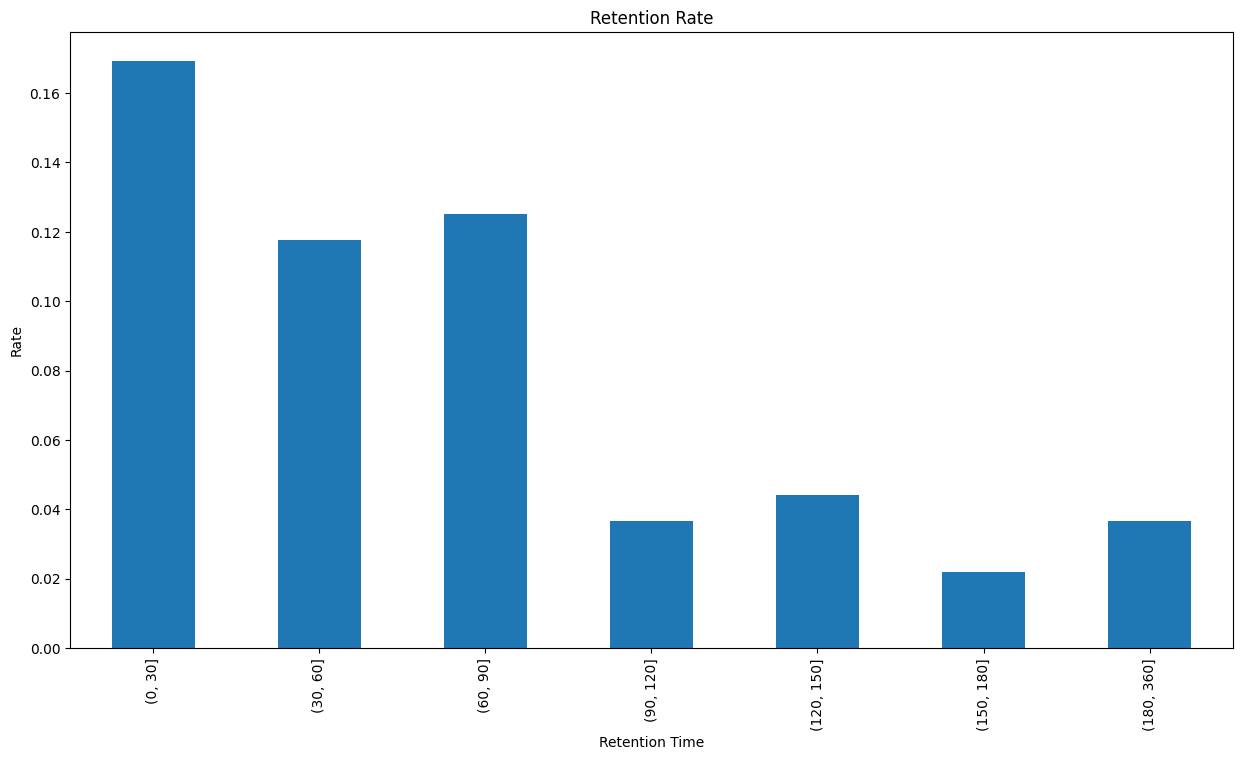

In [28]:
retention_rate = pivoted_retention_trans.sum()/pivoted_retention_trans.count()
retention_rate.plot.bar()
plt.xlabel('Retention Time')
plt.ylabel('Rate')
plt.title('Retention Rate')